#### Import dependencies

In [1]:
import findspark
findspark.init()
import pyspark

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

#### Load data

In [3]:
# path of the current directory
cur_dir = os.getcwd()
print("Current directory: {}".format(cur_dir))
# list files in the current directory
#print("Files in the current directory: {}".format(os.listdir(cur_dir)))
data_path = cur_dir+"/drugsCom"
train_path = data_path + "/train.csv"
test_path = data_path + "/test.csv"
whole_path = data_path + "/whole.csv"
fda_path = data_path + "/fda.csv"

print("Path of the raw data: {}".format(data_path))
print("Files in the drugCom directory: {}".format(os.listdir(data_path)))

Current directory: /Users/qin/Desktop/DrugCom/CS6250_Project
Path of the raw data: /Users/qin/Desktop/DrugCom/CS6250_Project/drugsCom
Files in the drugCom directory: ['whole.csv', 'test.csv', 'drugs_recalls_fda.tsv', 'readme.md', 'drugsComTest_raw.tsv', 'fda.csv', 'drugsComTrain_raw.tsv', 'train.csv']


In [4]:
fda = pd.read_csv(fda_path)

Reference:

https://github.com/IkshitaMishra/TwitterAnalysis/blob/twitter/TwitterSentimentalAnalysis.ipynb

### FDA data

In [5]:
fda.head()

,Date,Brand,Product Description,Reason / Problem,Company
0,10/30/2018,"WP Westminster, more","Irbesartan Tablets, USP 75 mg, 150 mg, and 300...","due to the presence of an impurity, N-nitrosod...","ScieGen Pharmaceuticals, Inc"
1,10/26/2018,Aurobindo Pharma Limited,Irbesartan Drug,"Due to the presence of an impurity, N-nitrosod...",AuroMedics Pharma LLC
2,10/22/2018,Promise Pharmacy,Prednisolone and Gatifloxacin Ophthalmic Solution,Unidentified small particulate floating in the...,Promise Pharmacy
3,10/15/2018,Zero Xtreme,Dietary Supplement for Weight Loss,Undeclared Sibutramine,Fat Burners Zone
4,10/10/2018,ReGen Series,All ReGen Series products,Adverse reactions,"Liveyon, LLC"


In [6]:
fda['Brand'].count()

162

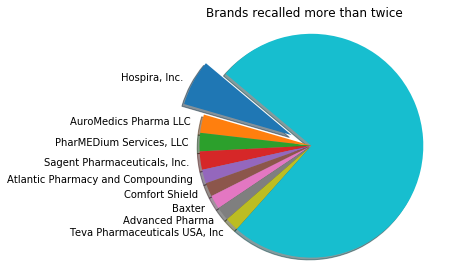

In [7]:
fda_brand_count = fda['Brand'].value_counts().reset_index().rename(columns = {'index': 'Brand', 'Brand':'Count'})
#print(fda_brand_count.head(30))
labels = list(fda_brand_count[fda_brand_count['Count']>2]['Brand'])
labels.append('')

sizes = list(fda_brand_count[fda_brand_count['Count']>2]['Count'])
sizes.append(fda_brand_count.shape[0]-fda_brand_count[fda_brand_count['Count']>2]['Count'].shape[0])

explode = list(np.zeros(len(labels)))  # explode 1st slice
explode[0] = 0.2
explode = tuple(explode)

# Plot
fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=labels, explode=explode, shadow=True, startangle=140)
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=140)
#patches, texts, autotexts = ax1.pie(sizes,labels=labels, explode=explode, shadow=True, startangle=140)
#plt.legend(patches, labels, loc='lower right')
ax1.axis('equal')  
plt.title('Brands recalled more than twice')
plt.tight_layout()
plt.show()

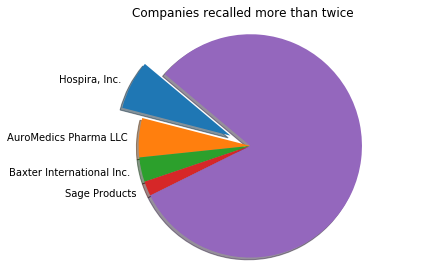

In [8]:
fda_company_count = fda['Company'].value_counts().reset_index().rename(columns = {'index': 'Company', 'Company':'Count'})
#print(fda_company_count.head(30))

labels = list(fda_company_count[fda_company_count['Count']>2]['Company'])
labels.append('')

sizes = list(fda_company_count[fda_company_count['Count']>2]['Count'])
sizes.append(fda_company_count.shape[0]-fda_company_count[fda_company_count['Count']>2]['Count'].shape[0])

explode = list(np.zeros(len(labels)))  # explode 1st slice
explode[0] = 0.2
explode = tuple(explode)

# Plot
fig1, ax1 = plt.subplots()
#ax1.pie(sizes, labels=labels, explode=explode, shadow=True, startangle=140)
ax1.pie(sizes, explode=explode, labels=labels, shadow=True, startangle=140)
#patches, texts, autotexts = ax1.pie(sizes,labels=labels, explode=explode, shadow=True, startangle=140)
#plt.legend(patches, labels, loc='lower right')
ax1.axis('equal')  
plt.title('Companies recalled more than twice')
plt.tight_layout()
plt.show()
